<h1 style="text-align: center; font-weight: bolder">
    Aprendizaje No Supervisado
</h1>

## **Clustering**

Son estrategías que podemos usar para agrupar los datos de tal manera que todos los que pertenezcan a un grupo, sean lo más similares que sea posible entre sí y lo más diferentes a los otros grupos.

### **¿Cúando usarlo?**

- Cuando no conocemos con anterioridad las etiquetas de nuestros datos.
- Queremos descubrir patrones ocultos a simple vista.
- Queremos identificar datos atípicos.

## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.options.display.max_columns = False

In [60]:
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

## **Datos**

In [3]:
# Cargamos nuestro dataset
df = pd.read_csv('data/candy.csv')

In [5]:
df.sample(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
13,Dots,0,1,0,0,0,0,0,0,1,0.732,0.511,42.272076
17,Gobstopper,0,1,0,0,0,0,1,0,1,0.906,0.453,46.783348
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
26,Jawbusters,0,1,0,0,0,0,1,0,1,0.093,0.511,28.127439
6,Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547


In [8]:
# Creamos el dataset con nuestros features
X = df.drop('competitorname', axis=1)

## **Modelos**

### **Kmeans**

In [22]:
# Inicializamos el modelo
kmeans = KMeans(n_clusters=4)

In [23]:
# Entrenamos el modelo
kmeans.fit(X)

KMeans(n_clusters=4)

In [65]:
# Realizamos una predición con el modelo
kmeans_pred = kmeans.predict(X)

In [67]:
# Agregamos la predicción a nuestro dataset
df['KMeans_Pred'] = kmeans_pred

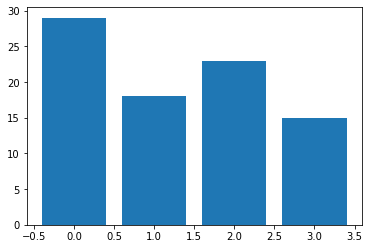

In [99]:
kmeans_result = df.groupby('KMeans_Pred')[['competitorname']].count().reset_index()

plt.bar(kmeans_result['KMeans_Pred'], height=kmeans_result['competitorname'])
plt.show()

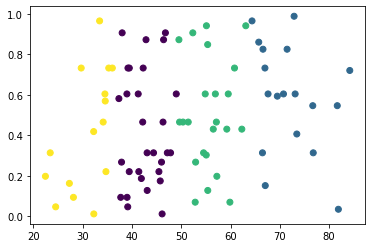

In [68]:
# Graficamos la distribución de los clusters
plt.scatter(df['winpercent'], df['sugarpercent'], c=df['KMeans_Pred'])
plt.show()

### **Mean-Shift**

In [71]:
# Inicializamos el modelo
mean_shift = MeanShift()

In [62]:
# Entrenamos el modelo
mean_shift.fit(X)

MeanShift()

In [64]:
# Realizamos una predición con el modelo
mean_shift_pred = mean_shift.predict(X)

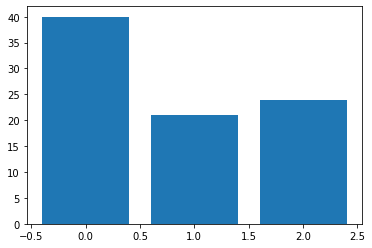

In [98]:
mean_shift_result = df.groupby('Mean_Shift_Pred')[['competitorname']].count().reset_index()

plt.bar(mean_shift_result['Mean_Shift_Pred'], height=mean_shift_result['competitorname'])
plt.show()

In [72]:
# Agregamos la predicción a nuestro dataset
df['Mean_Shift_Pred'] = mean_shift_pred

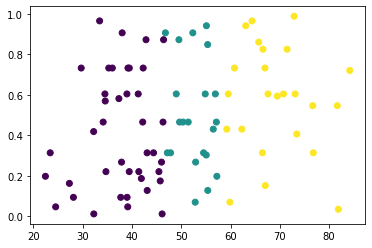

In [73]:
# Graficamos la distribución de los clusters
plt.scatter(df['winpercent'], df['sugarpercent'], c=df['Mean_Shift_Pred'])
plt.show()